# Analysis of the Effect of Advertising on Sales

In [55]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [56]:
advertising_df = pd.read_csv("Advertising.csv")

# the data has now been loaded into the dataframe
# let us now get the head of the df 
advertising_df.head()
advertising_df.drop(columns = 'Unnamed: 0', inplace=True)
advertising_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [57]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [58]:
# Dataset is stored in a pandas dataframe, let's take out all the variables in a numpy array
Sales = advertising_df.Sales.values.reshape(len(advertising_df['Sales']), 1)
TV = advertising_df.TV.values.reshape(len(advertising_df['Sales']), 1)
Radio = advertising_df.Radio.values.reshape(len(advertising_df['Sales']), 1)
Newspaper = advertising_df.Newspaper.values.reshape(len(advertising_df['Sales']), 1)


In [59]:
# let us fit the simple linear regression model with the TV feature
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)

# let us fit the simple linear regression model with the Radio feature
radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

# let us fit the simple linear regression model with the Newspaper feature
newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

# let us store the above results in a dictionary and then display using a dataframe
dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [61]:
# Let us now calculate R^2
tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


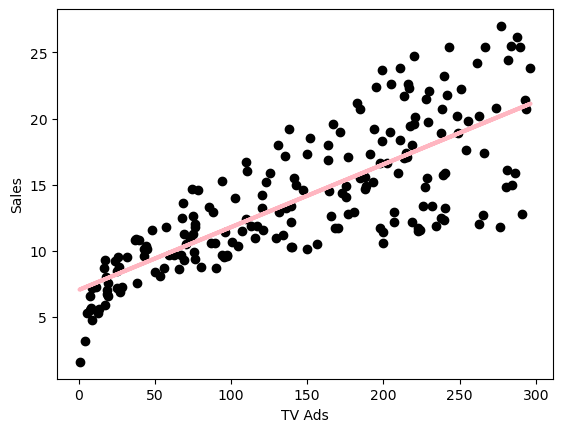

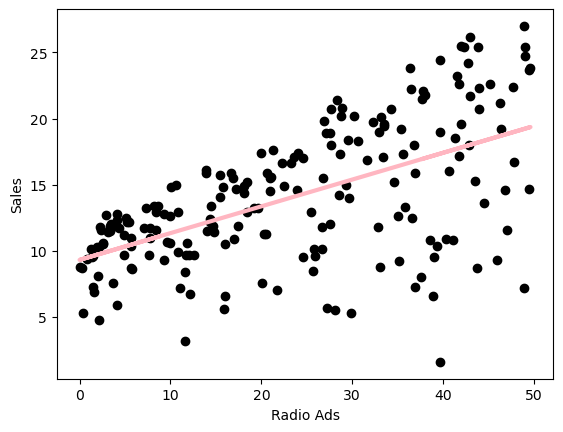

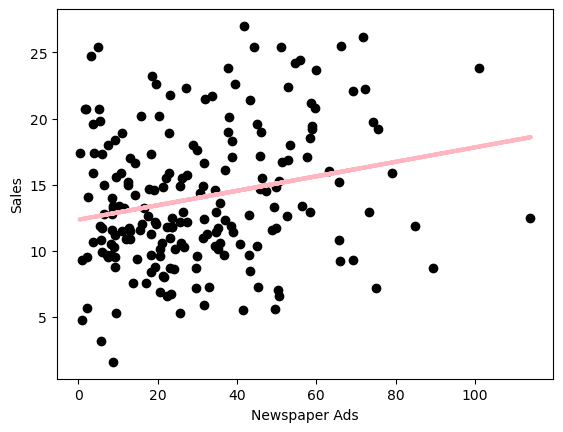

In [72]:
plt.scatter(TV, Sales,  color='black')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='#FFB6C1', linewidth=3)
plt.show()

plt.scatter(Radio, Sales,  color='black')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='#FFB6C1', linewidth=3)
plt.show()

plt.scatter(Newspaper, Sales,  color='black')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='#FFB6C1', linewidth=3)
plt.show()

In [73]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(advertising_df[['TV', 'Radio', 'Newspaper']], advertising_df['Sales'])

LinearRegression()

In [80]:
advertising_df['Sales_Predicted']  = mlr_model.predict(advertising_df[['TV', 'Radio', 'Newspaper']]) 
advertising_df['Error'] = (advertising_df['Sales_Predicted'] - advertising_df['Sales'])**2
MSE_MLR = advertising_df['Error'].mean()
MSE_MLR
mlr_model.score(advertising_df[['TV', 'Radio', 'Newspaper']], advertising_df['Sales'])

0.8972106381789521

In [82]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = advertising_df).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        03:46:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())

# Visualizing Confidence Bands in SLR

TypeError: lmplot() got an unexpected keyword argument 'advertising'

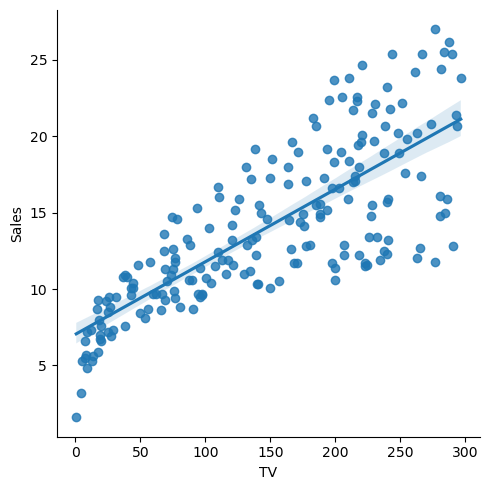

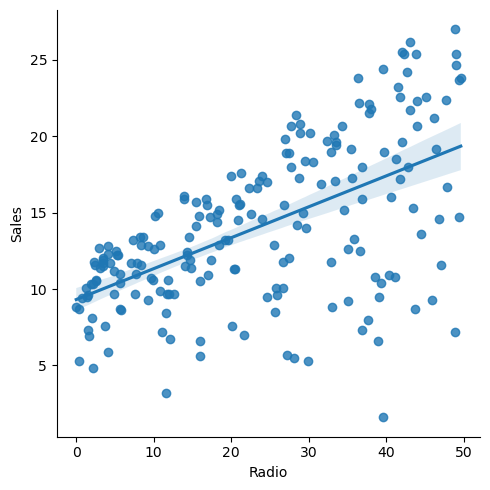

In [86]:
import seaborn as sns
sns.lmplot(x = 'TV', y = 'Sales', data = advertising_df)

sns.lmplot(x = 'Radio', y = 'Sales', data = advertising_df )

sns.lmplot(x = 'Newspaper', y = 'Sales', advertising = advertising_df)